EDA and Preprocessing

In [198]:
#importing libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import _tree
from scipy.stats import loguniform


In [157]:
any_2015 = pd.read_csv("2015.csv")
any_2016 = pd.read_csv("2016.csv")
any_2017 = pd.read_csv("2017.csv")
any_2018 = pd.read_csv("2018.csv")
any_2019 = pd.read_csv("2019.csv")

In [158]:
any_2017 = any_2017.rename(columns = {
    'Happiness.Rank':'Happiness Rank', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 
    'Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'
})

any_2018 = any_2018.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})
any_2019 = any_2019.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})

In [159]:
for df in dfs:
    print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual'],
      dtype='object')
Index(['Happiness Rank', 'Country', 'Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Gene

In [160]:
dfs = [any_2015, any_2016, any_2017, any_2018, any_2019]

In [161]:
df = pd.concat(dfs) #unim datasets
df =df.sort_values(by = ['Country']) #els ordenem per país

print("Número de mostres: ", len(df), "\n")

for col in df.columns:
    print(col)
    print("nulls: ", df[col].isnull().sum(), "\n")

Número de mostres:  782 

Country
nulls:  0 

Region
nulls:  467 

Happiness Rank
nulls:  0 

Happiness Score
nulls:  467 

Standard Error
nulls:  624 

Economy (GDP per Capita)
nulls:  0 

Family
nulls:  0 

Health (Life Expectancy)
nulls:  0 

Freedom
nulls:  0 

Trust (Government Corruption)
nulls:  1 

Generosity
nulls:  0 

Dystopia Residual
nulls:  467 

Lower Confidence Interval
nulls:  625 

Upper Confidence Interval
nulls:  625 

Happiness.Score
nulls:  627 

Whisker.high
nulls:  627 

Whisker.low
nulls:  627 

Dystopia.Residual
nulls:  627 

Score
nulls:  470 



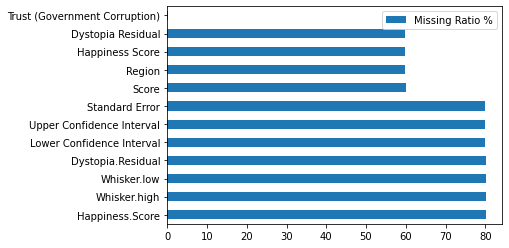

In [162]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        pyplot.show()
    else:
        print('No NAs found')
plot_nas(df)

In [163]:
df = df.drop(columns=['Happiness Score','Standard Error','Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval','Happiness.Score','Whisker.high','Whisker.low','Dystopia.Residual','Score',])
df = df.reset_index()
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Cyprus')].index)
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Macedonia')].index)

df.at[625,['Country']] = 'Somaliland Region'

Tractament dels valors nuls restants

In [164]:
countries = list(set(df['Country'].values))
countries = sorted(countries)

In [165]:
new_regions = []
countriess = []
for i in range(len(countries)):
        country_index = np.where(df['Country'] == countries[i]) # Get indexes of current country
        countriess.append(country_index)
        current_country_df = df.iloc[country_index] #get values of current indexes
        if all(pd.isnull(current_country_df['Region'].values)): # if all null for regions, drop country from df
            country_index = np.where(df['Country'] == countries[i])[0]
            for vals in country_index:
                try:
                    df = df.drop(index = vals)
                except KeyError:
                    pass
        else:
            region_name_pos = np.where([type(x) == str for x in current_country_df['Region'].values])[0][0] #posicio del primer valor no nul de regio per aquell pais
            region = current_country_df['Region'].values[region_name_pos] #obtencio de la regio en questio
            current_country_df = current_country_df.replace(np.nan, region) #reemplaçem els valors nuls ab el nom d'aquella regio
            new_regions.append(current_country_df['Region'].values)

In [166]:
total_mostres_pais = []
valors_nuls = []
new_countries = []
for count in countriess:
    total_mostres_pais.append(len(count[0]))
    comptador = 0 #nombre valors nulls per pais
    for i in count[0]:
        current = df.iloc[i]['Region']
        if(current!=current):
            comptador+=1
            new_countries.append(df.iloc[i]['Country'])
    valors_nuls.append(comptador)

new_countries = set(new_countries)

<ipython-input-251-4e8e74261276>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


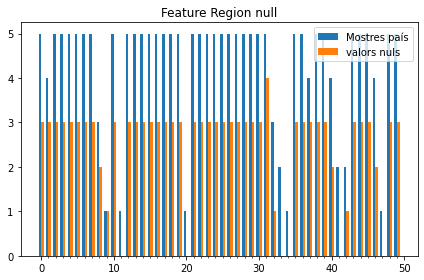

In [251]:
labels = countries[100:150]
totalvalues = total_mostres_pais[100:150]
nanvalues = valors_nuls[100:150]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, totalvalues, width, label='Mostres país')
rects2 = ax.bar(x + width/2, nanvalues, width, label='valors nuls')

ax.set_title('Feature Region null')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()
plt.show()

In [168]:
new_regions = list(new_regions)
k = 0
region_vals = []
for arr in new_regions:
    for vals in arr:
        region_vals.append(vals)
        k+=1

In [169]:
df['Region'] = region_vals
df.head(20)

,index,Country,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,153,Afghanistan,Southern Asia,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
1,152,Afghanistan,Southern Asia,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
2,144,Afghanistan,Southern Asia,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
3,153,Afghanistan,Southern Asia,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
4,140,Afghanistan,Southern Asia,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
5,108,Albania,Central and Eastern Europe,109,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313
6,108,Albania,Central and Eastern Europe,109,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400
7,111,Albania,Central and Eastern Europe,112,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000
8,106,Albania,Central and Eastern Europe,107,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000
9,94,Albania,Central and Eastern Europe,95,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720


In [170]:
#Convertire les regions en variables categóriques i les afegiré com a columnes ja que poden
#aportar informació interessant

In [171]:
one_hot_regions = pd.get_dummies(df['Region'],prefix = 'Region') #convertim les regions en un dataset categóric
df = df.join(one_hot_regions) #afegim les noves columnes al dataframe principal
df = df.drop(columns = 'Region') #eliminem la columna de les regions

In [172]:
#ara el data frame llueix així:
df

,index,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,153,Afghanistan,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,0,0,0,0,0,0,0,1,0,0
1,152,Afghanistan,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,0,0,0,0,0,0,0,1,0,0
2,144,Afghanistan,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,0,0,0,0,0,0,0,1,0,0
3,153,Afghanistan,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,0,0,0,0,0,0,0,1,0,0
4,140,Afghanistan,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,143,Zimbabwe,144,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,0,0,0,0,0,0,0,0,1,0
778,145,Zimbabwe,146,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,0,0,0,0,0,0,0,0,1,0
779,114,Zimbabwe,115,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,0,0,0,0,0,0,0,0,1,0
780,130,Zimbabwe,131,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,0,0,0,0,0,0,0,0,1,0


In [173]:
rank = df.sort_values('Happiness Rank')
rank.head(-20)

,index,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
220,0,Finland,1,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,0,0,0,0,0,0,0,0,0,1
670,0,Switzerland,1,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,0,0,0,0,0,0,0,0,0,1
525,0,Norway,1,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,0,0,0,0,0,0,0,0,0,1
223,0,Finland,1,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,0,0,0,0,0,0,0,0,0,1
188,0,Denmark,1,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,151,Rwanda,152,0.359000,0.711000,0.614000,0.555000,0.411000,0.217000,0,0,0,0,0,0,0,0,1,0
769,151,Yemen,152,0.442000,1.073000,0.343000,0.244000,0.064000,0.083000,0,0,0,0,1,0,0,0,0,0
676,151,Syria,152,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,0,0,0,0,1,0,0,0,0,0
690,152,Tanzania,153,0.476000,0.885000,0.499000,0.417000,0.147000,0.276000,0,0,0,0,0,0,0,0,1,0


Un altre caraterística a modificar és el rang de felicitat ('Happiness Rank') ja que serà la nostra característica objectiu, la característica a predir segons les altres cracterístiques. 
Com el seu rang de valors és molt ampli, concretament pot agafar valors de l'1 al 158 i per tant predir-lo seria massa complicat. Com el que ens interessa en el fons és saber si la població és majoritáriament feliç o no, dividrem les msotres segons feliços = 1 (amb happiness rank >= mitja) o no feliços = 0.

In [174]:
happiness_benchmark = []
for rank in df['Happiness Rank'].values:
    if rank <= 20:
        happiness_benchmark.append(1)
    else:
        happiness_benchmark.append(0)
df['Happiness Rank'] = happiness_benchmark

df=df.sample(frac=1) #barrejem les dades

In [175]:
df = df.drop(columns = ['Country', 'index'])

In [176]:
df = df.dropna(axis=0)
target = df['Happiness Rank'] #definim happiness rank com a objectiu a predir
target

161    0
390    0
107    0
441    0
284    0
      ..
635    0
576    0
354    0
95     0
307    0
Name: Happiness Rank, Length: 770, dtype: int64

In [177]:
target = list(target)
df.corr().abs()['Happiness Rank'].sort_values(ascending = False)

Happiness Rank                            1.000000
Region_Western Europe                     0.555736
Trust (Government Corruption)             0.541324
Economy (GDP per Capita)                  0.443096
Health (Life Expectancy)                  0.414134
Freedom                                   0.407891
Family                                    0.347957
Generosity                                0.315190
Region_Australia and New Zealand          0.298632
Region_North America                      0.298632
Region_Sub-Saharan Africa                 0.221382
Region_Central and Eastern Europe         0.174275
Region_Southeastern Asia                  0.094562
Region_Southern Asia                      0.083820
Region_Eastern Asia                       0.074616
Region_Middle East and Northern Africa    0.073314
Region_Latin America and Caribbean        0.044679
Name: Happiness Rank, dtype: float64

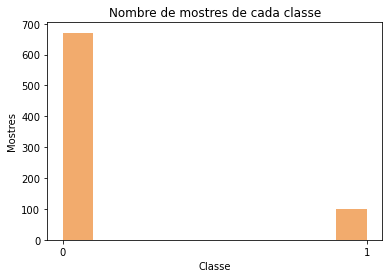

In [33]:
edades = ['Top 20','Not top 20']

intervalos = [0,1] #indicamos los extremos de los intervalos

plt.hist(x=target, color='#F2AB6D',)
plt.title('Nombre de mostres de cada classe')
plt.xlabel('Classe')
plt.ylabel('Mostres')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

veiem que les classes no estan balancejades i per tant utilitzare l'f1-score per evaluar les prediccions

In [34]:
df = df.drop(columns = ['Happiness Rank'])

In [35]:
df.isnull().values.any() #comprovem qu eno hi ha cap valor null

False

In [36]:
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
32,1.372000,1.548000,1.036000,0.557000,0.290000,0.332000,1,0,0,0,0,0,0,0,0,0
512,0.752160,0.644980,0.051080,0.278540,0.030500,0.232190,0,0,0,0,0,0,0,0,1,0
705,1.211830,1.183540,0.614830,0.558840,0.011400,0.318440,0,0,0,1,0,0,0,0,0,0
46,1.488412,1.323110,0.653133,0.536747,0.257042,0.172668,0,0,0,0,1,0,0,0,0,0
440,0.648457,1.272031,0.285349,0.096098,0.136957,0.201870,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.375382,1.376290,0.838404,0.405989,0.085242,0.330083,0,0,0,0,1,0,0,0,0,0
755,0.719000,1.584000,0.605000,0.724000,0.259000,0.328000,0,1,0,0,0,0,0,0,0,0
76,0.885416,1.340127,0.495879,0.501538,0.173380,0.474055,0,0,0,0,0,0,0,1,0,0
328,0.569000,0.808000,0.232000,0.352000,0.090000,0.154000,0,0,0,0,0,0,0,0,1,0


Anem a crear l'arbre

In [40]:
n = len(df)
percentatge = int(0.8 * n)
caracteristiques = df.columns
x_train = df[list(caracteristiques)][:percentatge]
y_train = target[:percentatge]

x_test = df[list(caracteristiques)][percentatge:]
y_test = target[percentatge:]


scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Creació random forest

In [41]:
#rf_classifier = RandomForestClassifier()
#rf_classifier.fit(x_train,y_train)

In [42]:
scores = []
for i in np.arange(1,4): #Want to make it read-able
    max_depth = i
    print('max_depth :', i)
    dt_classifier = DecisionTreeClassifier(max_depth = max_depth)
    dt_classifier.fit(x_train,y_train)
    pred = dt_classifier.predict(x_test)
    score = f1_score(y_true = y_test, y_pred = pred)
    print(score)
    scores.append(score)
    
best = np.max(scores)
best_depth = np.where(scores == best)[0][0]

dt_classifier = DecisionTreeClassifier(max_depth = best_depth+1)
dt_classifier.fit(x_train,y_train)

max_depth : 1
0.7058823529411764
max_depth : 2
0.7407407407407408
max_depth : 3
0.7826086956521738


DecisionTreeClassifier(max_depth=3)

[Text(1023.0, 1807.4699999999998, 'Economy (GDP per Capita) <= 0.695\ngini = 0.243\nsamples = 616\nvalue = [529, 87]\nclass = Not Top 20'),
 Text(558.0, 1291.05, 'Region_Australia and New Zealand <= 0.5\ngini = 0.063\nsamples = 489\nvalue = [473, 16]\nclass = Not Top 20'),
 Text(372.0, 774.6299999999999, 'Health (Life Expectancy) <= 0.713\ngini = 0.056\nsamples = 487\nvalue = [473, 14]\nclass = Not Top 20'),
 Text(186.0, 258.21000000000004, 'gini = 0.019\nsamples = 425\nvalue = [421, 4]\nclass = Not Top 20'),
 Text(558.0, 258.21000000000004, 'gini = 0.271\nsamples = 62\nvalue = [52, 10]\nclass = Not Top 20'),
 Text(744.0, 774.6299999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Top 20'),
 Text(1488.0, 1291.05, 'Freedom <= 0.727\ngini = 0.493\nsamples = 127\nvalue = [56, 71]\nclass = Top 20'),
 Text(1116.0, 774.6299999999999, 'Family <= 0.907\ngini = 0.245\nsamples = 42\nvalue = [36, 6]\nclass = Not Top 20'),
 Text(930.0, 258.21000000000004, 'gini = 0.184\nsamples = 39\nvalu

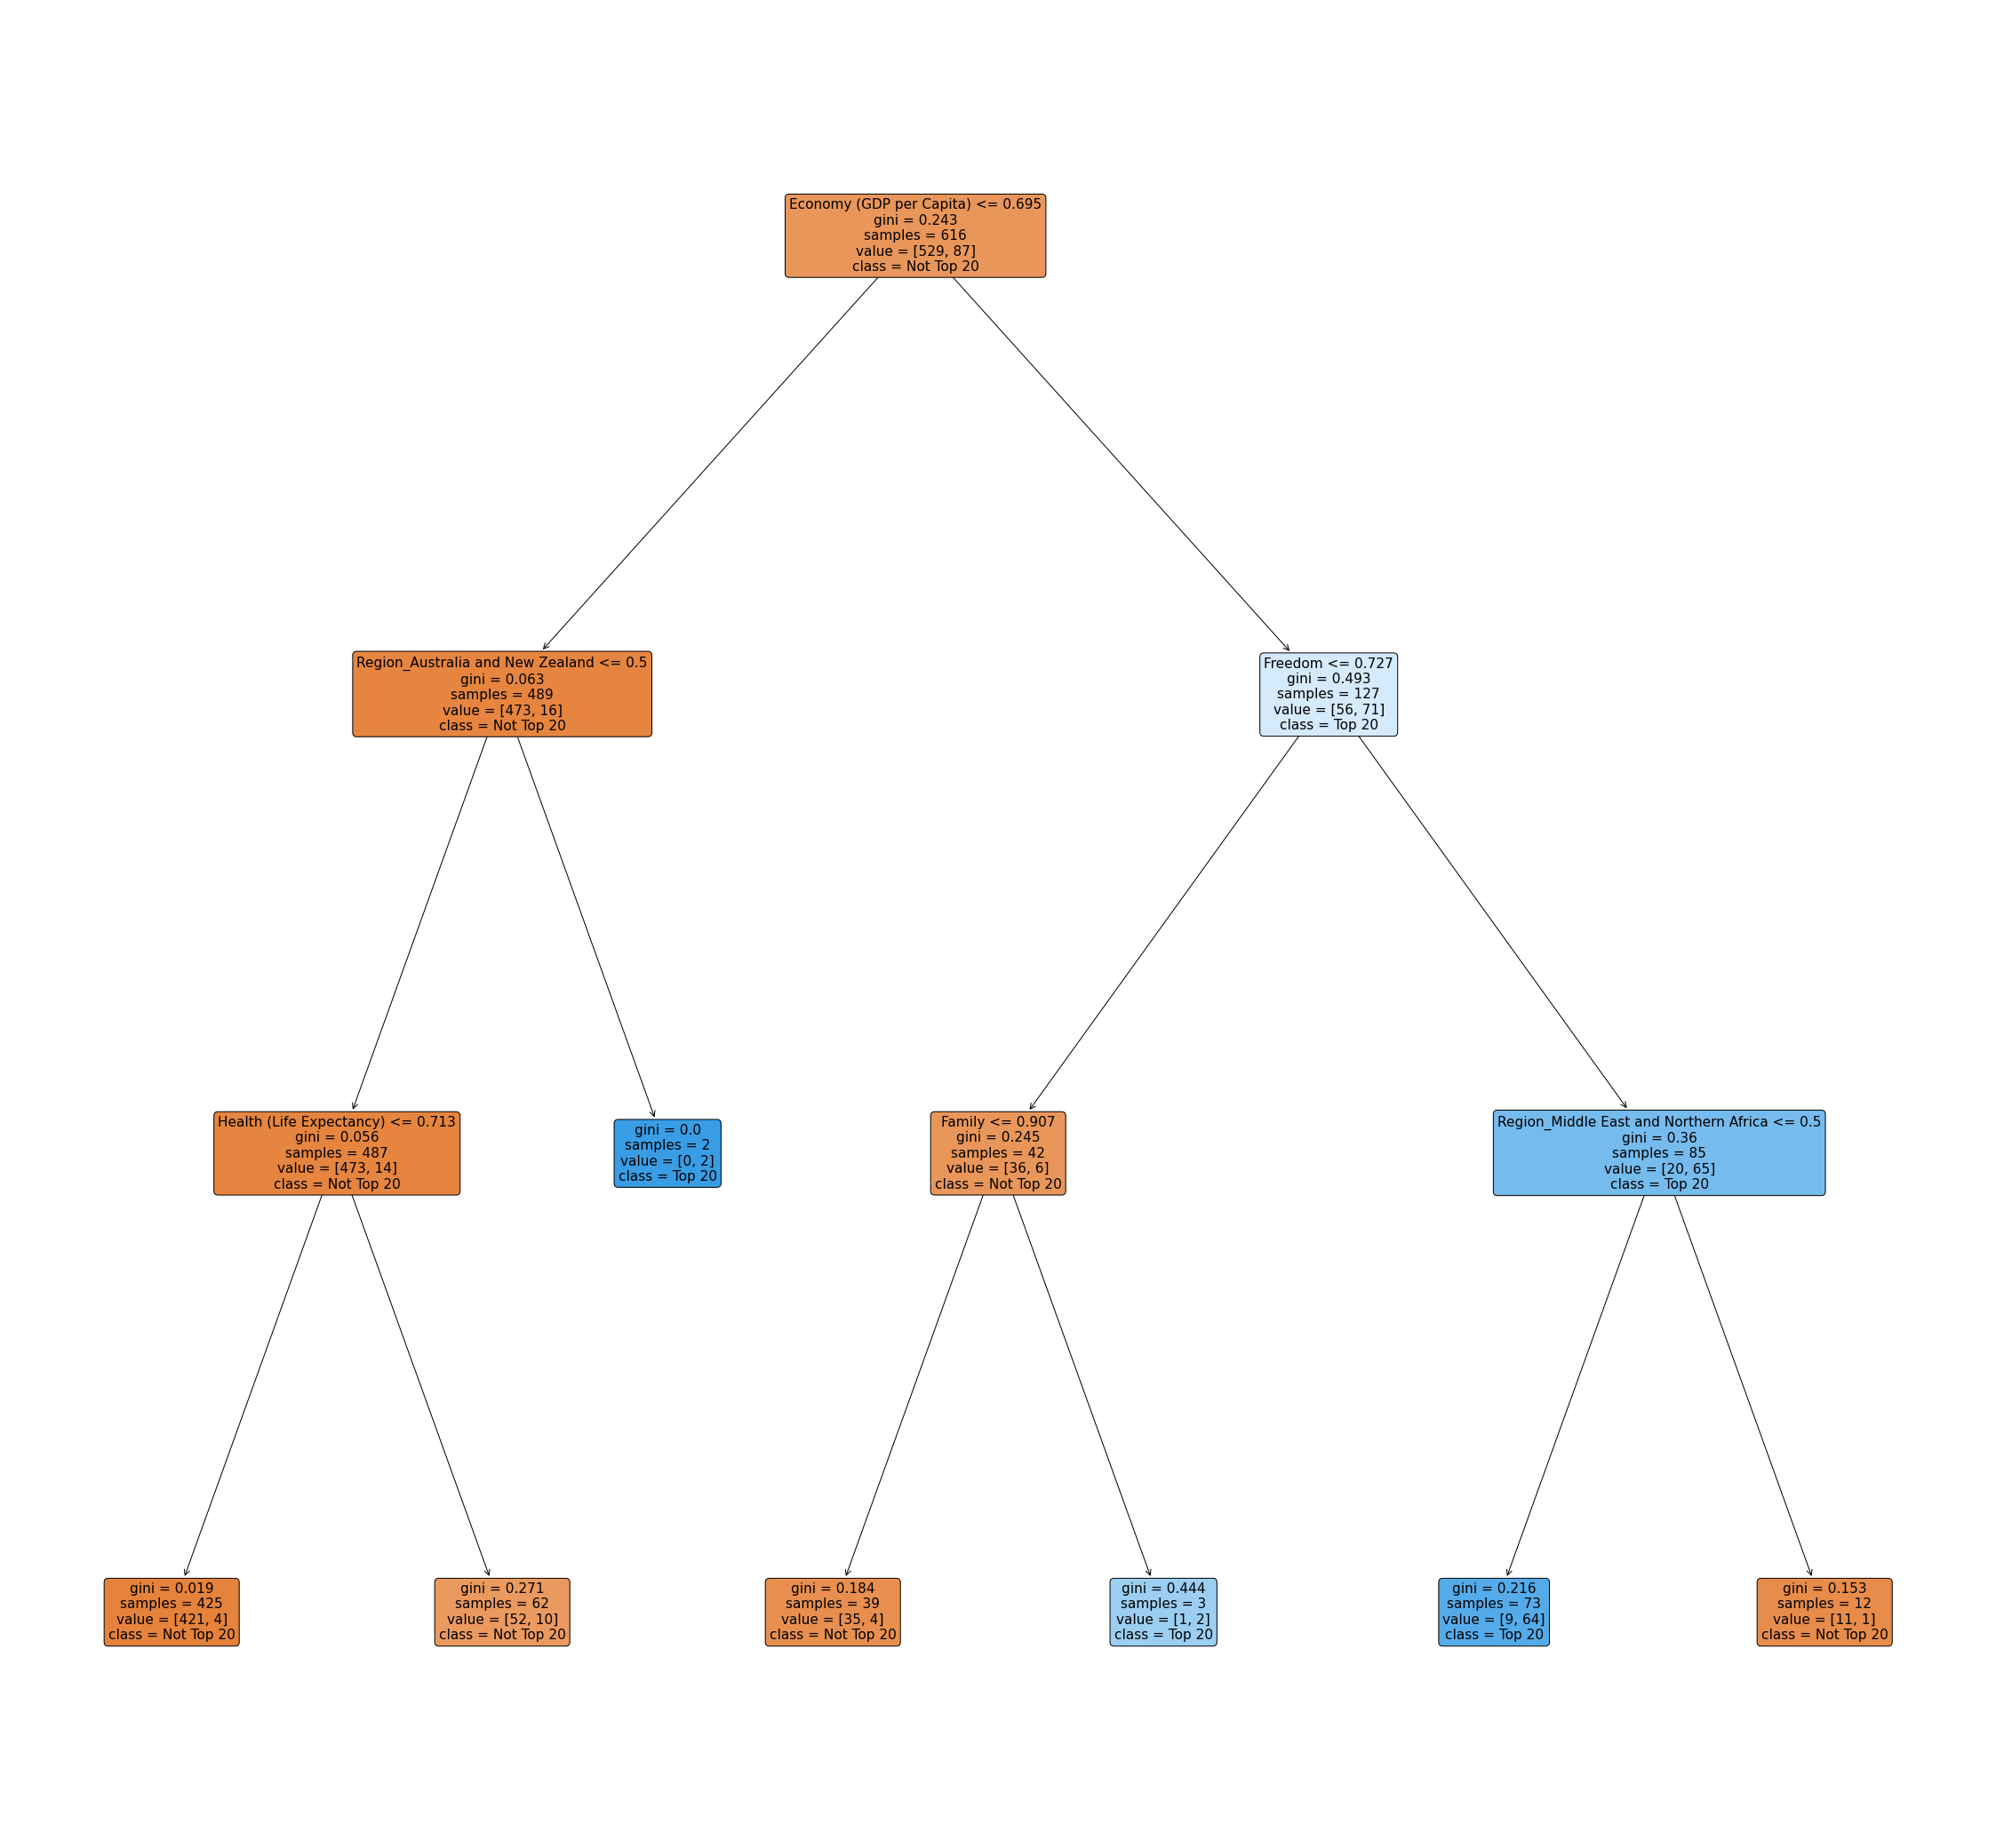

In [43]:
plt.figure(figsize=(40,38))
plot_tree(dt_classifier, feature_names = caracteristiques, class_names = ['Not Top 20', 'Top 20'],  # 0 -> not top 25, 1 -> top 25
          filled=True, rounded = True)

In [44]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):", feature_names )
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print (indent,"if ", name," <= ", threshold)
            recurse(tree_.children_left[node], depth + 1)
            print (indent,"else: if ", name," > ", threshold)
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(indent, "return ", tree_.value[node][0])

    recurse(0, 1)
    
tree_to_code(dt_classifier,caracteristiques)

def tree({}): Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Region_Australia and New Zealand', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')
   if  Economy (GDP per Capita)  <=  0.6951699256896973
     if  Region_Australia and New Zealand  <=  0.5
       if  Health (Life Expectancy)  <=  0.7125503718852997
         return  [421.   4.]
       else: if  Health (Life Expectancy)  >  0.7125503718852997
         return  [52. 10.]
     else: if  Region_Australia and New Zealand  >  0.5
       return  [0. 2.]
   else: if  Economy (GDP per Capita)  >  0.6951699256896973
     if  Freedom  <=  0.7265560925006866
       if  Fami

In [45]:
preds_dtc = dt_classifier.predict(x_test)
#preds_rfc = rf_classifier.predict(x_test)

In [46]:
f1_score(y_true = y_test, y_pred = preds_dtc)

0.7826086956521738

In [47]:
#accuracy_score(y_true = y_test, y_pred = preds_rfc)

In [48]:
target_names = ['class 0', '(Top 20) class 1']
print(classification_report(y_test, preds_dtc, target_names=target_names))

                  precision    recall  f1-score   support

         class 0       0.98      0.99      0.98       142
(Top 20) class 1       0.82      0.75      0.78        12

        accuracy                           0.97       154
       macro avg       0.90      0.87      0.88       154
    weighted avg       0.97      0.97      0.97       154



Hyperparameter Search

In [132]:
dtc = DecisionTreeClassifier()

decisiontree_params = [{'max_depth': list(range(1, 40, 5)), 'max_features': list(range(1,df.shape[1])), 
                        'criterion': ['gini', 'entropy'], 'splitter' : ['best', 'random']}]
criterion_list =[]
depth_list = []
features_list = []
splitter = []
for i in np.arange(1,10):
    clf = GridSearchCV(dtc, decisiontree_params, cv = StratifiedKFold() , scoring='f1', n_jobs = -1)
    clf.fit(x_train, y_train)
    print(clf.best_params_)
    print(clf.best_score_)
    depth_list.append(clf.best_params_['max_depth'])
    criterion_list.append(clf.best_params_['criterion'])
    features_list.append(clf.best_params_['max_features'])
    splitter.append(clf.best_params_['splitter'])

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 6, 'splitter': 'random'}
0.8276165011459129
{'criterion': 'gini', 'max_depth': 26, 'max_features': 13, 'splitter': 'random'}
0.856281711120421
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 10, 'splitter': 'random'}
0.8207091583562172
{'criterion': 'gini', 'max_depth': 26, 'max_features': 5, 'splitter': 'random'}
0.848107328107328
{'criterion': 'entropy', 'max_depth': 26, 'max_features': 15, 'splitter': 'random'}
0.8532186732186734
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 5, 'splitter': 'random'}
0.8199901540148874
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 11, 'splitter': 'random'}
0.8306303990127519
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 7, 'splitter': 'random'}
0.8353854332801701
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'splitter': 'random'}
0.8343939393939394


In [133]:
dtc = DecisionTreeClassifier()

decisiontree_params = [{'max_depth': list(range(1, 40, 5)), 'max_features': list(range(1,df.shape[1])), 
                        'criterion': ['gini', 'entropy'], 'splitter' : ['best', 'random']}]

for i in np.arange(1,10):
    clf = RandomizedSearchCV(dtc, decisiontree_params, cv = StratifiedKFold() , scoring='f1', n_jobs = -1)
    clf.fit(x_train, y_train)
    print(clf.best_params_)
    print(clf.best_score_)
    depth_list.append(clf.best_params_['max_depth'])
    criterion_list.append(clf.best_params_['criterion'])
    features_list.append(clf.best_params_['max_features'])
    splitter.append(clf.best_params_['splitter'])

{'splitter': 'random', 'max_features': 5, 'max_depth': 21, 'criterion': 'entropy'}
0.7520131336769705
{'splitter': 'random', 'max_features': 14, 'max_depth': 6, 'criterion': 'entropy'}
0.795554180818854
{'splitter': 'random', 'max_features': 7, 'max_depth': 16, 'criterion': 'gini'}
0.8152107541581225
{'splitter': 'random', 'max_features': 6, 'max_depth': 11, 'criterion': 'gini'}
0.8007291949037679
{'splitter': 'best', 'max_features': 2, 'max_depth': 36, 'criterion': 'entropy'}
0.7786587753380921
{'splitter': 'random', 'max_features': 6, 'max_depth': 21, 'criterion': 'gini'}
0.7863713274007391
{'splitter': 'random', 'max_features': 10, 'max_depth': 36, 'criterion': 'gini'}
0.7967679379444086
{'splitter': 'random', 'max_features': 13, 'max_depth': 21, 'criterion': 'gini'}
0.8215919701213819
{'splitter': 'random', 'max_features': 7, 'max_depth': 16, 'criterion': 'gini'}
0.7690408087124914


In [136]:
print("max_depth: ", max(set(depth_list), key=depth_list.count))
print("criterion: ", max(set(criterion_list), key=criterion_list.count))
print("max_features: ", max(set(features_list), key=features_list.count))
print("splitter: ", max(set(splitter), key=splitter.count))

max_depth:  11
criterion:  entropy
max_features:  6
splitter:  random


In [151]:
final_DT_classifier = DecisionTreeClassifier(max_depth = 11, max_features = 6, splitter = 'random', criterion = 'entropy')
final_DT_classifier.fit(x_train,y_train)
y_hat2 = final_DT_classifier.predict(x_test)
f1_score(y_true = y_test, y_pred = y_hat2)

0.9090909090909091

[Text(1207.7260273972604, 1979.61, 'Region_Western Europe <= 0.499\nentropy = 0.587\nsamples = 616\nvalue = [529, 87]\nclass = Not Top 20'),
 Text(657.3698630136987, 1807.4699999999998, 'Economy (GDP per Capita) <= 0.429\nentropy = 0.316\nsamples = 524\nvalue = [494, 30]\nclass = Not Top 20'),
 Text(596.2191780821918, 1635.33, 'entropy = 0.0\nsamples = 220\nvalue = [220, 0]\nclass = Not Top 20'),
 Text(718.5205479452055, 1635.33, 'Health (Life Expectancy) <= 0.687\nentropy = 0.465\nsamples = 304\nvalue = [274, 30]\nclass = Not Top 20'),
 Text(244.6027397260274, 1463.1899999999998, 'Region_Latin America and Caribbean <= 0.73\nentropy = 0.212\nsamples = 209\nvalue = [202, 7]\nclass = Not Top 20'),
 Text(122.3013698630137, 1291.05, 'Region_North America <= 0.893\nentropy = 0.099\nsamples = 156\nvalue = [154, 2]\nclass = Not Top 20'),
 Text(61.15068493150685, 1118.9099999999999, 'entropy = 0.0\nsamples = 154\nvalue = [154, 0]\nclass = Not Top 20'),
 Text(183.45205479452056, 1118.9099999999

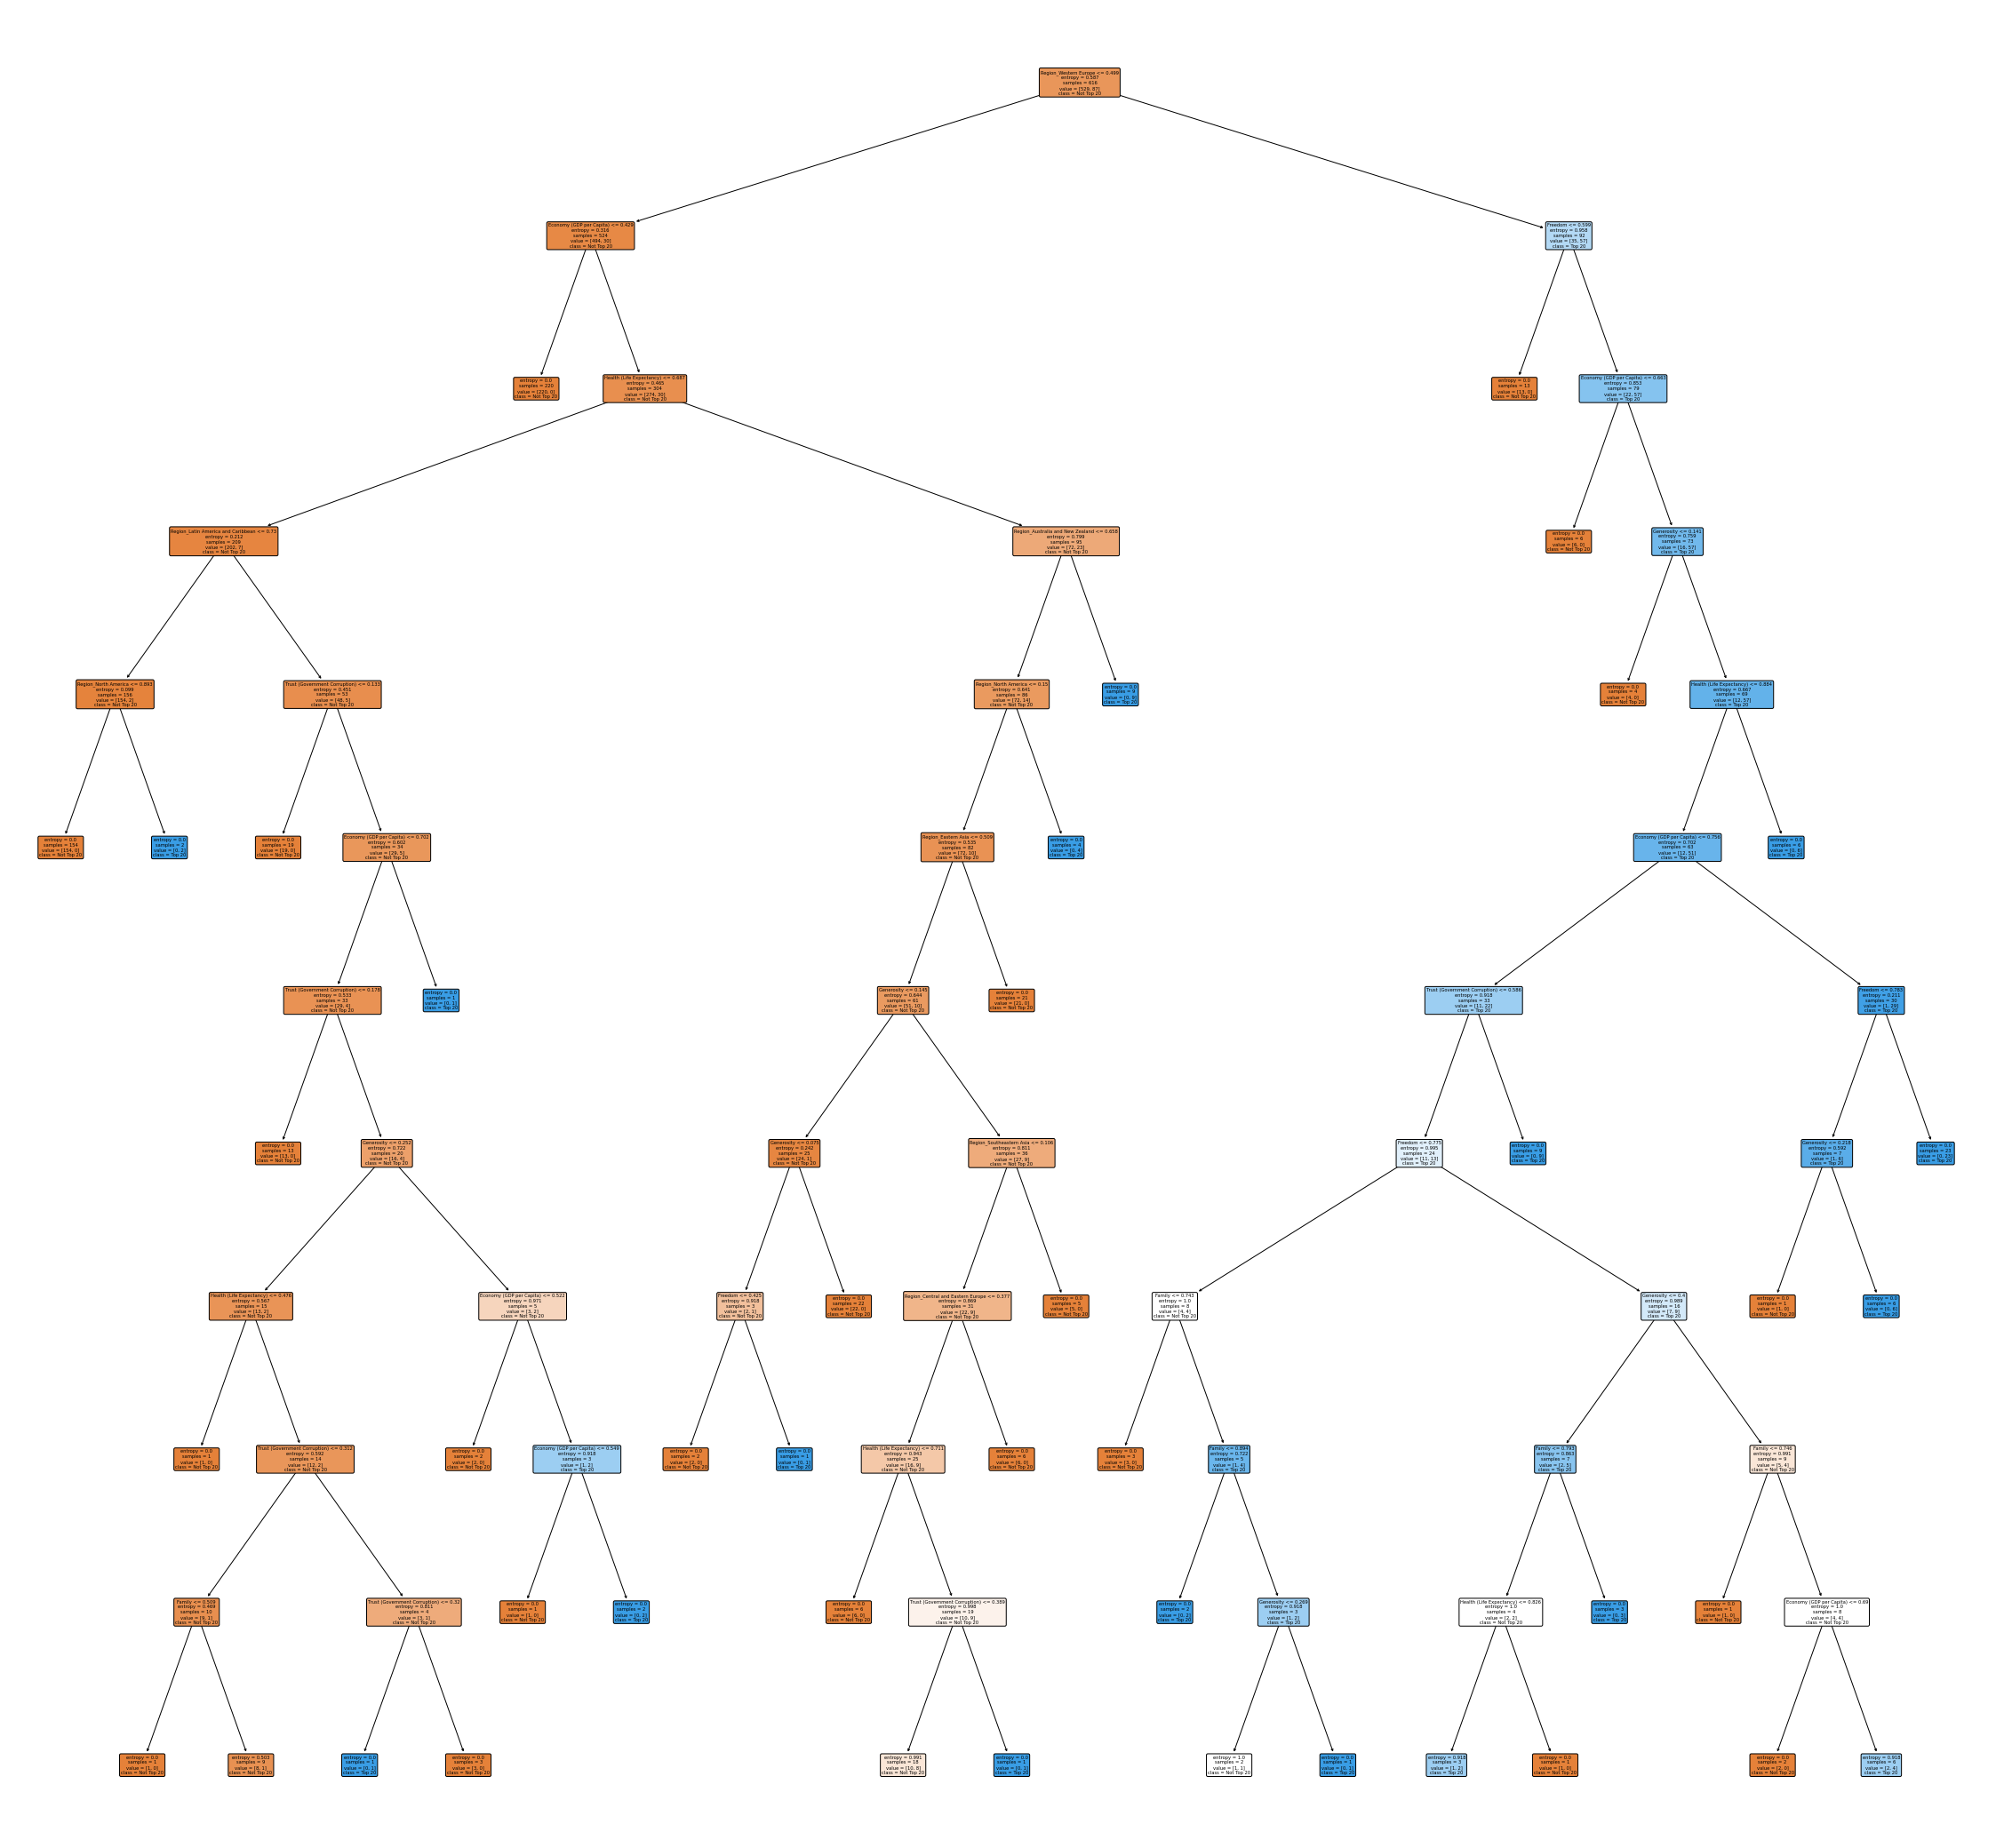

In [152]:
plt.figure(figsize=(40,38))
plot_tree(final_DT_classifier, feature_names = caracteristiques, class_names = ['Not Top 20', 'Top 20'],  # 0 -> not top 25, 1 -> top 25
          filled=True, rounded = True)

In [153]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):", feature_names )
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print (indent,"if ", name," <= ", threshold)
            recurse(tree_.children_left[node], depth + 1)
            print (indent,"else: if ", name," > ", threshold)
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(indent, "return ", tree_.value[node][0])

    recurse(0, 1)
    
tree_to_code(final_DT_classifier,caracteristiques)

def tree({}): Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Region_Australia and New Zealand', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')
   if  Region_Western Europe  <=  0.4987564801698348
     if  Economy (GDP per Capita)  <=  0.4290680491500851
       return  [220.   0.]
     else: if  Economy (GDP per Capita)  >  0.4290680491500851
       if  Health (Life Expectancy)  <=  0.6869393682346826
         if  Region_Latin America and Caribbean  <=  0.7297379471034454
           if  Region_North America  <=  0.8933274740787817
             return  [154.   0.]
           else: if  Region_North America  >  0.8933274740

In [154]:
final_DT_classifier.tree_.impurity

array([0.58746084, 0.31643802, 0.        , 0.46481071, 0.21161653,
       0.0989591 , 0.        , 0.        , 0.45079139, 0.        ,
       0.6024308 , 0.53283506, 0.        , 0.72192809, 0.56650951,
       0.        , 0.59167278, 0.46899559, 0.        , 0.50325833,
       0.81127812, 0.        , 0.        , 0.97095059, 0.        ,
       0.91829583, 0.        , 0.        , 0.        , 0.79852377,
       0.64094418, 0.5349437 , 0.64363941, 0.24229219, 0.91829583,
       0.        , 0.        , 0.        , 0.81127812, 0.86913758,
       0.94268319, 0.        , 0.99800088, 0.99107606, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.95834852, 0.        , 0.85337282, 0.        , 0.75866386,
       0.        , 0.66657836, 0.70246655, 0.91829583, 0.99498483,
       1.        , 0.        , 0.72192809, 0.        , 0.91829583,
       1.        , 0.        , 0.98869941, 0.86312057, 1.        ,
       0.91829583, 0.        , 0.        , 0.99107606, 0.     

In [249]:
model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

C_list =[]
penalty_list = []
solver_list = []
for i in np.arange(1,10):
    clf = RandomizedSearchCV(model, space, n_iter=500, scoring='f1', n_jobs=-1, cv=cv, random_state=1)
    clf.fit(x_train, y_train)
    print(clf.best_params_)
    print(clf.best_score_)
    C_list.append(clf.best_params_['C'])
    penalty_list.append(clf.best_params_['penalty'])
    solver_list.append(clf.best_params_['solver'])

Best Score: 0.8309818695809408
Best Hyperparameters: {'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408
{'C': 1.6159531754886576, 'penalty': 'l2', 'solver': 'liblinear'}
0.8309818695809408


C:\Users\NOA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80534277        nan 0.80534277        nan 0.         0.
 0.         0.                nan        nan        nan        nan
 0.80534277        nan 0.82748342        nan        nan 0.80534277
 0.                nan 0.82831675 0.         0.80534277 0.
 0.80506712        nan 0.80534277        nan 0.80534277 0.82983091
 0.                nan 0.80534277        nan 0.80534277 0.82576773
        nan 0.80534277 0.                nan 0.         0.82724377
 0.         0.                nan 0.                nan        nan
        nan        nan        nan 0.80534277        nan 0.80534277
        nan 0.80534277        nan        nan        nan        nan
 0.80163906        nan 0.82071499 0.                nan 0.
        nan 0.81231858 0.80534277 0.                nan        nan
        nan        nan 0.80534277 0.83051174        nan 0.
 0.         0.805342

In [252]:
print("C: ", max(set(C_list), key=C_list.count))
print("penalty: ", max(set(penalty_list), key=penalty_list.count))
print("solver: ", max(set(solver_list), key=solver_list.count))

C:  1.6159531754886576
penalty:  l2
solver:  liblinear


In [254]:
final_Logreg_classifier = LogisticRegression(C=1.61, penalty = 'l2', solver = 'liblinear')
final_Logreg_classifier.fit(x_train,y_train)
y_hat2 = final_Logreg_classifier.predict(x_test)
f1_score(y_true = y_test, y_pred = y_hat2)

0.9090909090909091